In [ ]:
!pip install underthesea

     |████████████████████████████████| 7.6 MB 5.3 MB/s 
     |████████████████████████████████| 235 kB 45.0 MB/s 
     |████████████████████████████████| 581 kB 45.6 MB/s 
     |████████████████████████████████| 965 kB 31.5 MB/s 


In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 5.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=ee1a9e7071efb53f1da6e5c2c1749c971f40ceccac0a3425abf08bf1f0acc1c5
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
!pip install mtranslate

  Created wheel for mtranslate: filename=mtranslate-1.8-py3-none-any.whl size=3695 sha256=0994cc6156c632d25cb5a824f93742a66a5bb1f7ff4aef6f09874e9d198e2c02
  Stored in directory: /root/.cache/pip/wheels/a4/5d/18/6ea549ba042f5f29728049065bdc8a5cdb3c88a413bb026c9a
Successfully built mtranslate


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import string
import re
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
from underthesea import word_tokenize
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, Conv1D, MaxPool1D, Flatten, Dropout, LSTM, Bidirectional, BatchNormalization, GRU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
alpha = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789 '

In [ ]:
viet_tat = {'sp': 'sản phẩm', 'k': 'không', 'đc': 'được', 'wa':'quá', '1*': '1 sao', '2*': '2 sao', '3*': '3 sao', '4*': '4 sao', '5*': '5 sao', 'dc': 'được', 'ok':'được'}

In [ ]:
#Data
dataset = pd.read_excel('/content/drive/MyDrive/NLP/comment_file_full.xlsx')
dataset = dataset.dropna()

In [ ]:
dataset

,Label,Comment
0,0.0,hàng đẹp
1,0.0,Máy rất đẹp
2,0.0,tôt
3,0.0,Good
4,0.0,Ok
...,...,...
6988,0.0,giày đẹp lắm
6989,0.0,sản phẩm tạm được
6990,0.0,sản phẩm giống y hình rất đẹp
6991,40.0,nhân viên giao hàng rất ok sản phẩm vừa với gi...


#Tiền xử lý dữ liệu


In [ ]:
#Thay các từ việt tắt
def thay_viet_tat(text):
    text = text.split()
    result = []
    for i in text:
        if i in viet_tat.keys():
            result.append(viet_tat[i])
        else:
            result.append(i)
    return ' '.join(result)

In [ ]:
text = 'sp tạm đc'
print(thay_viet_tat(text))

sản phẩm tạm được


In [ ]:
#Loại bỏ ký tự đặc biệt
pun = string.punctuation
def remove_char_spec(text):
    return ''.join([i for i in text if i not in pun])

In [ ]:
text = 'sp tạm đc @@'
print(remove_char_spec(text))

sp tạm đc 


In [ ]:
#Loại bỏ emoji
def remove_emoji(text):
    text = text.lower()
    return ''.join([i for i in text if i in alpha])

In [ ]:
text = 'sp tạm đc 🥰🥰🥰'
print(remove_emoji(text))

sp tạm đc 


In [ ]:
#Dịch câu sang tiếng việt
from langdetect import detect
from mtranslate import translate
def translate_text(text):
    if detect(text) != 'vi':
        return translate(text, from_language=detect(text), to_language='vi')
    return text

In [ ]:
text = 'good product'
print(translate_text(text))

sản phẩm tốt


In [ ]:
label = []
old_data = []
new_data = []

In [ ]:
for i in tqdm(dataset.values):
    label.append(i[0])
    old_data.append(i[1])
    text = thay_viet_tat(i[1])
    text = remove_char_spec(text)
    text = remove_emoji(text)
    text = translate_text(text)
    new_data.append(text)

100%|██████████| 6991/6991 [00:26<00:00, 259.05it/s]


In [ ]:
df = [['label', 'old data', 'new data']]
for i, j, k in zip(label, old_data, new_data):
    df.append([i, j, k])
df = np.array(df)

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df

,0,1,2
0,label,old data,new data
1,0.0,hàng đẹp,hàng đẹp
2,0.0,Máy rất đẹp,may rât đep
3,0.0,tôt,tôt
4,0.0,Good,tốt
...,...,...,...
6987,0.0,giày đẹp lắm,giày đẹp lắm
6988,0.0,sản phẩm tạm được,sản phẩm tạm được
6989,0.0,sản phẩm giống y hình rất đẹp,sản phẩm giống y hình rất đẹp
6990,40.0,nhân viên giao hàng rất ok sản phẩm vừa với gi...,nhân viên giao hàng rất được sản phẩm vừa với ...


In [ ]:
df.to_excel('/content/drive/MyDrive/NLP/new_comment_file.xlsx', header=0, index = False)

In [ ]:
a = Counter(label)
a

Counter({0.0: 3710,
         1.0: 877,
         2.0: 680,
         3.0: 108,
         4.0: 28,
         5.0: 571,
         30.0: 684,
         31.0: 112,
         32.0: 16,
         40.0: 148,
         41.0: 40,
         42.0: 17})

<BarContainer object of 12 artists>

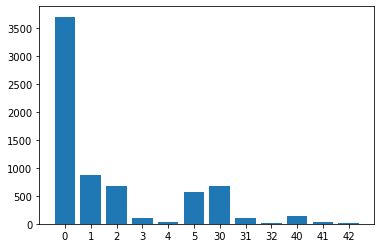

In [ ]:
label = [0, 1, 2, 3, 4, 5, 30, 31, 32, 40, 41, 42]
value = []
for i in label:
  value.append(a[i])

plt.bar([str(i) for i in label], value)

In [ ]:
new_data = [word_tokenize(i, format = 'text') for i in new_data]

In [ ]:
#Tạo vocab
class Vocab:
    def __init__(self):
        self.word2id = {}
        self.id2word = {}
    def fit(self, data):
        idx = 1
        self.maxlen = 0
        for i in data:
            for char in i.split():
                if char not in self.word2id.keys():
                    self.word2id[char] = idx
                    self.id2word[idx] = char
                    idx+=1
            if len(i.split()) > self.maxlen:
                self.maxlen = len(i.split())

        self.vocab_size = len(self.word2id) +3

        self.word2id['<start>'] = len(self.word2id)
        self.id2word[len(self.word2id)] = '<start>'

        self.word2id['<end>'] = len(self.word2id)+1
        self.id2word[len(self.word2id)+1] = '<end>'

        self.word2id['<pad>'] = 0
        self.id2word[0] = '<pad>'

    def encode(self, text):
        assert len(self.word2id)>0,  "Chưa fit data"
        text = text.split()
        result = [self.word2id['<start>']]
        for i in text:
            result.append(self.word2id[i])
        result.append(self.word2id['<end>'])
        return result     

In [ ]:
vocab = Vocab()
vocab.fit(new_data)

In [ ]:
vocab.maxlen

218

In [ ]:
vocab.vocab_size

5446

#Download word vector

In [ ]:
!pip install fasttext

     |████████████████████████████████| 68 kB 3.3 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3148340 sha256=a3d7d0f6f07592cc9b0aa4b383f52db49f9c319b191369eb07bc54424349165f
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
import fasttext.util

In [ ]:
#fasttext.util.download_model('vi', if_exists='ignore')  
ft = fasttext.load_model('/content/drive/MyDrive/NLP/cc.vi.300.bin')

In [ ]:
embedding_dim = 300

embedding_matrix = np.zeros((vocab.vocab_size, embedding_dim))

for word, i in vocab.word2id.items():
    if i == 0:
        continue
    embedding_vector = ft.get_word_vector(word)
    embedding_matrix[i] = embedding_vector

In [ ]:
del ft

In [ ]:
train_x = []
for i in new_data:
    train_x.append(vocab.encode(i))

In [ ]:
train_x = pad_sequences(train_x, maxlen = vocab.maxlen, padding = 'post')

In [ ]:
train_x.shape

(6991, 218)

In [ ]:
y = np.unique(dataset.values[:,0])
lookup = {}
for i in range(0, len(y+1)):
  lookup[(y[i])] = i

lookup

{0.0: 0,
 1.0: 1,
 2.0: 2,
 3.0: 3,
 4.0: 4,
 5.0: 5,
 30.0: 6,
 31.0: 7,
 32.0: 8,
 40.0: 9,
 41.0: 10,
 42.0: 11}

In [ ]:
temp = []
for i in dataset.values:
  temp.append(lookup[i[0]])

In [ ]:
train_y = to_categorical(temp, num_classes=12)

In [ ]:
train_x.shape, train_y.shape

((6991, 218), (6991, 12))

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.1)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1)

#GRU

In [ ]:
trans_label = {}
trans_label[0] = 'Tốt'
trans_label[1] = 'Bình thường'
trans_label[2] = 'Tệ'
trans_label[3] = 'Nhanh'
trans_label[4] = 'Chậm'
trans_label[5] = 'Khác'
trans_label[6] = 'Tốt nhanh'
trans_label[7] = 'Bình thường nhanh'
trans_label[8] = 'Tệ nhanh'
trans_label[9] = 'Tốt chậm'
trans_label[10] = 'Bình thường chậm'
trans_label[11] = 'Tệ chậm'

In [ ]:
model = Sequential()
model.add(Embedding(vocab.vocab_size, 300, input_length=vocab.maxlen, weights=[embedding_matrix], trainable = False))

model.add(Conv1D(64, 3, activation = 'relu'))
model.add(MaxPool1D())
model.add(BatchNormalization())
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(MaxPool1D())
model.add(BatchNormalization())

model.add(GRU(128, return_sequences=True))
model.add(GRU(256))

model.add(Dense(256, activation='relu')) 
model.add(Dense(64, activation='relu')) 
model.add(Dense(12, activation='softmax')) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 218, 300)          1633800   
                                                                 
 conv1d (Conv1D)             (None, 216, 64)           57664     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 108, 64)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 108, 64)          256       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 106, 128)          24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 53, 128)          0

In [ ]:
model.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=['acc'])

In [ ]:
h = model.fit(train_x, train_y, batch_size=32, epochs=10, validation_data=(val_x, val_y))

Epoch 1/10
177/177 [==============================] - 36s 44ms/step - loss: 1.5996 - acc: 0.5335 - val_loss: 1.5704 - val_acc: 0.5016
Epoch 2/10
177/177 [==============================] - 6s 32ms/step - loss: 1.5238 - acc: 0.5329 - val_loss: 1.4309 - val_acc: 0.5016
Epoch 3/10
177/177 [==============================] - 6s 32ms/step - loss: 1.2264 - acc: 0.5919 - val_loss: 1.3875 - val_acc: 0.5016
Epoch 4/10
177/177 [==============================] - 6s 33ms/step - loss: 1.0191 - acc: 0.6506 - val_loss: 1.0625 - val_acc: 0.6111
Epoch 5/10
177/177 [==============================] - 6s 33ms/step - loss: 0.8937 - acc: 0.6838 - val_loss: 0.9430 - val_acc: 0.6921
Epoch 6/10
177/177 [==============================] - 6s 32ms/step - loss: 0.8058 - acc: 0.7197 - val_loss: 0.8842 - val_acc: 0.7048
Epoch 7/10
177/177 [==============================] - 6s 33ms/step - loss: 0.7122 - acc: 0.7553 - val_loss: 0.9087 - val_acc: 0.7000
Epoch 8/10
177/177 [==============================] - 6s 32ms/step -

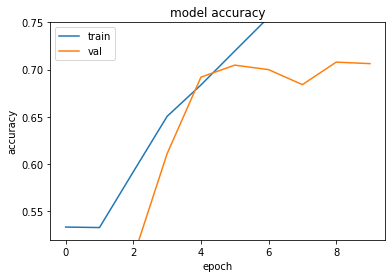

In [ ]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.52, 0.75)
plt.legend(['train', 'val'], loc='upper left')

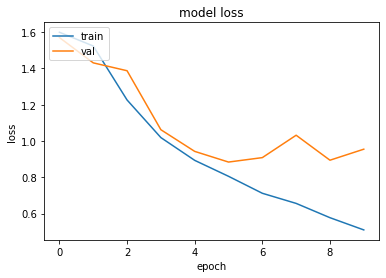

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [ ]:
model.evaluate(test_x, test_y)

22/22 [==============================] - 1s 24ms/step - loss: 1.0840 - acc: 0.6686


[1.08402419090271, 0.668571412563324]

In [ ]:
text = 'hàng này tốt quá đi nhưng giao hàng quá lâu'
text = word_tokenize(text, format = 'text')
text = vocab.encode(text)
text  = pad_sequences([text], maxlen = vocab.maxlen, padding = 'post')

In [ ]:
pred = model.predict(text)
print(trans_label[np.argmax(pred[0])])

Tốt chậm


#Bidirectional

In [ ]:
model_bid = Sequential()
model_bid.add(Embedding(input_dim=vocab.vocab_size,output_dim=300,input_length=vocab.maxlen,mask_zero = True,weights = [embedding_matrix],trainable = False))
model_bid.add(Bidirectional(LSTM(64)))
model_bid.add(Dense(32,activation='relu'))
model_bid.add(Dense(12,activation='softmax'))


In [ ]:
model_bid.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['acc'])
model_bid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 218, 300)          1633800   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              186880    
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 12)                396       
                                                                 
Total params: 1,825,204
Trainable params: 191,404
Non-trainable params: 1,633,800
_________________________________________________________________


In [ ]:
h_bid = model_bid.fit(train_x,train_y,epochs=10,validation_data=(val_x,val_y))

Epoch 1/10
177/177 [==============================] - 24s 69ms/step - loss: 0.2393 - acc: 0.5269 - val_loss: 0.1915 - val_acc: 0.5016
Epoch 2/10
177/177 [==============================] - 8s 48ms/step - loss: 0.1782 - acc: 0.5420 - val_loss: 0.1638 - val_acc: 0.5810
Epoch 3/10
177/177 [==============================] - 8s 48ms/step - loss: 0.1618 - acc: 0.5847 - val_loss: 0.1546 - val_acc: 0.5984
Epoch 4/10
177/177 [==============================] - 8s 47ms/step - loss: 0.1470 - acc: 0.6207 - val_loss: 0.1372 - val_acc: 0.6508
Epoch 5/10
177/177 [==============================] - 8s 48ms/step - loss: 0.1352 - acc: 0.6442 - val_loss: 0.1291 - val_acc: 0.6730
Epoch 6/10
177/177 [==============================] - 8s 47ms/step - loss: 0.1273 - acc: 0.6702 - val_loss: 0.1234 - val_acc: 0.7000
Epoch 7/10
177/177 [==============================] - 8s 47ms/step - loss: 0.1220 - acc: 0.6826 - val_loss: 0.1230 - val_acc: 0.7048
Epoch 8/10
177/177 [==============================] - 8s 47ms/step -

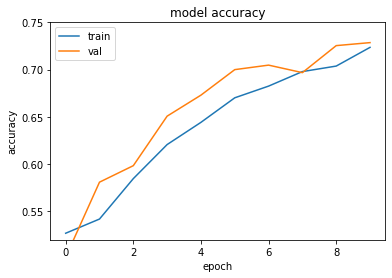

In [ ]:
plt.plot(h_bid.history['acc'])
plt.plot(h_bid.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.52, 0.75)
plt.legend(['train', 'val'], loc='upper left')

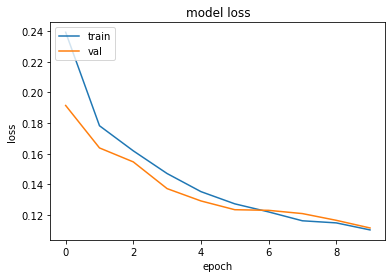

In [ ]:
plt.plot(h_bid.history['loss'])
plt.plot(h_bid.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [ ]:
model_bid.evaluate(test_x, test_y)

22/22 [==============================] - 0s 17ms/step - loss: 0.1174 - acc: 0.7086


[0.11737882345914841, 0.7085714340209961]

In [ ]:
text = 'giao hàng khá nhanh, hàng chất lượng tốt'
text = word_tokenize(text, format = 'text')
text = vocab.encode(text)
text  = pad_sequences([text], maxlen = vocab.maxlen, padding = 'post')

In [ ]:
pred = model_bid.predict(text)
print(trans_label[np.argmax(pred[0])])

Tốt nhanh


#CNN

In [ ]:
model_cnn  = Sequential()
model_cnn.add(Embedding(input_dim=vocab.vocab_size, output_dim=300,input_length=vocab.maxlen,mask_zero=True,weights = [embedding_matrix],trainable = False))
model_cnn.add(Conv1D(filters = 5, kernel_size=5))
model_cnn.add(MaxPool1D(pool_size= 2))
model_cnn.add(Flatten()) 
model_cnn.add(Dense(128,activation = 'relu'))
model_cnn.add(Dense(64,activation='relu'))
model_cnn.add(Dense(12,activation='softmax'))

In [ ]:
model_cnn.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['acc'])
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 218, 300)          1633800   
                                                                 
 conv1d_2 (Conv1D)           (None, 214, 5)            7505      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 107, 5)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 535)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               68608     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                      

In [ ]:
h_cnn = model_cnn.fit(train_x,train_y,epochs=10,validation_data=(val_x,val_y))

Epoch 1/10
177/177 [==============================] - 3s 13ms/step - loss: 0.2448 - acc: 0.5185 - val_loss: 0.1857 - val_acc: 0.5016
Epoch 2/10
177/177 [==============================] - 1s 8ms/step - loss: 0.1700 - acc: 0.5513 - val_loss: 0.1618 - val_acc: 0.5556
Epoch 3/10
177/177 [==============================] - 1s 8ms/step - loss: 0.1495 - acc: 0.6071 - val_loss: 0.1407 - val_acc: 0.6302
Epoch 4/10
177/177 [==============================] - 2s 9ms/step - loss: 0.1328 - acc: 0.6518 - val_loss: 0.1314 - val_acc: 0.6683
Epoch 5/10
177/177 [==============================] - 2s 9ms/step - loss: 0.1227 - acc: 0.6774 - val_loss: 0.1288 - val_acc: 0.6667
Epoch 6/10
177/177 [==============================] - 2s 9ms/step - loss: 0.1140 - acc: 0.7009 - val_loss: 0.1273 - val_acc: 0.6825
Epoch 7/10
177/177 [==============================] - 2s 9ms/step - loss: 0.1069 - acc: 0.7243 - val_loss: 0.1218 - val_acc: 0.7048
Epoch 8/10
177/177 [==============================] - 2s 9ms/step - loss: 0

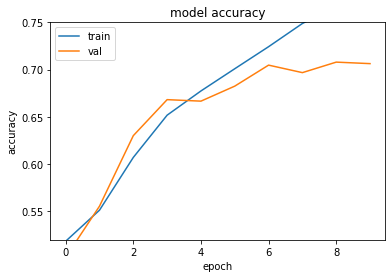

In [ ]:
plt.plot(h_cnn.history['acc'])
plt.plot(h_cnn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.52, 0.75)
plt.legend(['train', 'val'], loc='upper left')

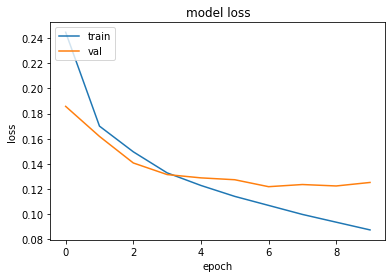

In [ ]:
plt.plot(h_cnn.history['loss'])
plt.plot(h_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [ ]:
text = 'hàng tệ quá, hơi thất vọng về chất lượng'
text = word_tokenize(text, format = 'text')
text = vocab.encode(text)
text  = pad_sequences([text], maxlen = vocab.maxlen, padding = 'post')

In [ ]:
pred = model_cnn.predict(text)
print(trans_label[np.argmax(pred[0])])

Tệ
